<a href="https://colab.research.google.com/github/brontominds/Titanic/blob/master/Kaggle_Titanic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [0]:
!mkdir -p ~/.kaggle

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [0]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 25.2MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 31.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.52MB/s]


In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
train_data = pd.read_csv(r"../content/train.csv")
test_data = pd.read_csv(r"../content/test.csv")

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
# Feature Engineering
from sklearn.impute import SimpleImputer

def nan_padding(data, columns):
    for column in columns:
        imputer=SimpleImputer()
        data[column]=imputer.fit_transform(data[column].values.reshape(-1,1))
    return data


nan_columns = ["Age", "SibSp", "Parch"]

train_data = nan_padding(train_data, nan_columns)
test_data = nan_padding(test_data, nan_columns)

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,0,0,1


In [0]:
test_passenger_id=test_data["PassengerId"]

In [0]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["Embarked"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

In [0]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["Pclass"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

In [17]:
from sklearn.preprocessing import LabelEncoder
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

train_data = sex_to_int(train_data)
test_data = sex_to_int(test_data)
train_data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1.0,0.0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0.0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0.0,113803,53.1000,C123,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0.0,0.0,373450,8.0500,NaN,0,0,1,0,0,1


In [18]:
from sklearn.preprocessing import MinMaxScaler

def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data
train_data = normalize_age(train_data)
test_data = normalize_age(test_data)
train_data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,0.271174,1.0,0.0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1.0,0.0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,0.321438,0.0,0.0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1.0,0.0,113803,53.1000,C123,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",1,0.434531,0.0,0.0,373450,8.0500,NaN,0,0,1,0,0,1


In [19]:
from sklearn.preprocessing import MinMaxScaler

def normalize_fare(data):
    scaler = MinMaxScaler()
    data["Fare"] = scaler.fit_transform(data["Fare"].values.reshape(-1,1))
    return data
train_data = normalize_fare(train_data)
test_data = normalize_fare(test_data)
train_data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,0.271174,1.0,0.0,A/5 21171,0.014151,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1.0,0.0,PC 17599,0.139136,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,0.321438,0.0,0.0,STON/O2. 3101282,0.015469,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1.0,0.0,113803,0.103644,C123,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",1,0.434531,0.0,0.0,373450,0.015713,NaN,0,0,1,0,0,1


In [0]:
train_data[['Cabin','PassengerId']].groupby('Cabin').agg(['count', 'size', 'nunique'])

In [0]:
train_data['CabinL'] = train_data['Cabin'].astype(str).str[0]
test_data['CabinL'] = test_data['Cabin'].astype(str).str[0]

In [0]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["CabinL"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

In [36]:
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,...,Pclass_3,CabinL_A,CabinL_B,CabinL_C,CabinL_D,CabinL_E,CabinL_F,CabinL_G,CabinL_T,CabinL_n
0,0,1,0.271174,1.0,0.0,0.014151,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0.472229,1.0,0.0,0.139136,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0.321438,0.0,0.0,0.015469,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0.434531,1.0,0.0,0.103644,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0.434531,0.0,0.0,0.015713,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [0]:
def drop_not_concerned(data, columns):
    return data.drop(columns, axis=1)

not_concerned_columns = ["PassengerId","Name", "Ticket",  "Cabin"]
train_data = drop_not_concerned(train_data, not_concerned_columns)
test_data = drop_not_concerned(test_data, not_concerned_columns)

In [0]:
import tensorflow as tf



In [0]:
!pip install -q seaborn


In [39]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


In [42]:
train_data.shape[1
                ]

21

In [0]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

def split_valid_test_data(data, fraction=(1 - 0.8)):
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)

    data_x = data.drop(["Survived"], axis=1)

    

    return data_x.values, data_y

data_x, data_y = split_valid_test_data(train_data)
print("data_x:{}".format(data_x.shape))
print("data_y:{}".format(data_y.shape))
print("data_y content:{}".format(data_y[:3]))

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[train_data.shape[1]]),
    layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [44]:
model = build_model()
model.build()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = data_x[:10]
example_result = model.predict(example_batch)
example_result

NameError: ignored

In [0]:
data_x

array([[1.        , 0.27117366, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.4722292 , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.32143755, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.36792055, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.32143755, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.39683338, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [0]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  data_x, data_y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,0.105291,0.226527,0.105291,0.131582,0.232688,0.131582,995
996,0.105744,0.220558,0.105744,0.129185,0.262528,0.129185,996
997,0.104100,0.219118,0.104100,0.138296,0.285521,0.138296,997
998,0.104663,0.229161,0.104663,0.131104,0.226148,0.131104,998
999,0.105939,0.221575,0.105939,0.127340,0.248991,0.127340,999


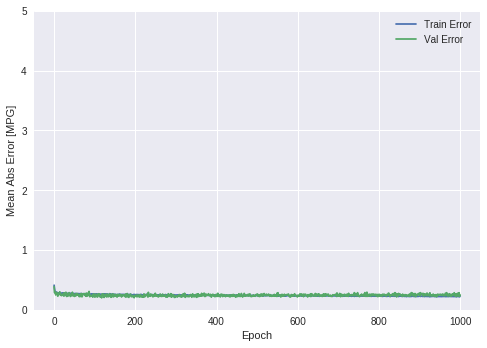

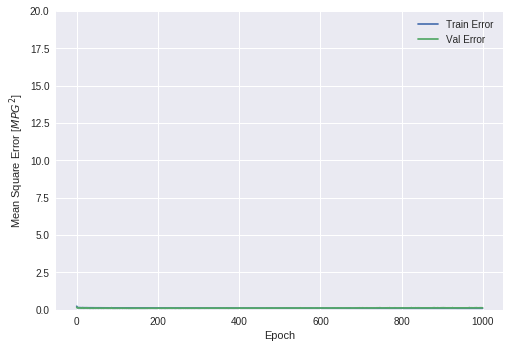

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


...........................................

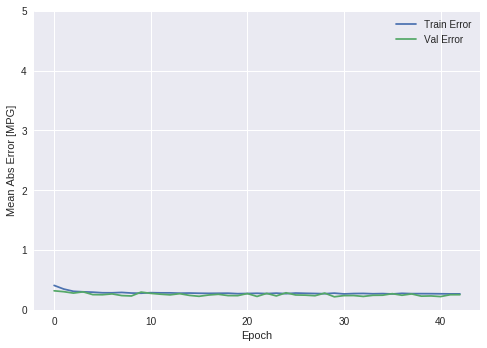

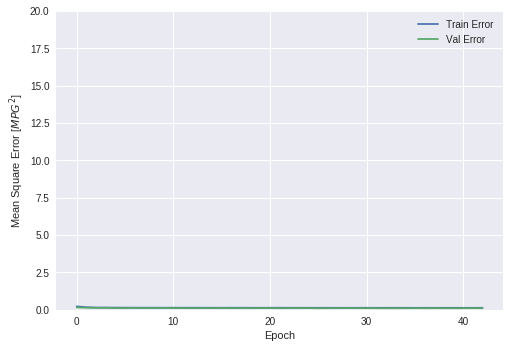

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(data_x, data_y, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
test_predictions = model.predict(test_data).flatten()

In [0]:
test_predictions

array([ 0.14231455,  0.5178818 ,  0.12064161,  0.16215968,  0.5242884 ,
        0.190568  ,  0.6084745 ,  0.24123946,  0.64711434,  0.10625923,
        0.1547555 ,  0.319902  ,  0.9906869 ,  0.15027013,  0.9796846 ,
        0.8870649 ,  0.13780797,  0.17179452,  0.5171837 ,  0.53262234,
        0.44981503,  0.4206285 ,  0.9686909 ,  0.43840522,  0.34668964,
        0.10786305,  1.0257337 ,  0.16972624,  0.3585142 ,  0.10954155,
        0.11838697,  0.03651406,  0.30797702,  0.3197124 ,  0.5226903 ,
        0.17561327,  0.6066939 ,  0.6390062 ,  0.16590708,  0.1547555 ,
        0.10828508,  0.4190706 ,  0.11648141,  0.8880777 ,  0.9777962 ,
        0.16590708,  0.3278659 ,  0.1547555 ,  0.8602158 ,  0.4087543 ,
        0.53445303,  0.12818219,  0.8738373 ,  0.9066484 ,  0.13298696,
        0.02303143,  0.14067104,  0.16590708,  0.12972243,  0.9426448 ,
        0.17861453,  0.13552308,  0.17654066,  0.6363034 ,  0.57492775,
        0.88754517,  0.64711434,  0.3119337 ,  0.4151852 ,  0.22

In [0]:
passenger_id=test_passenger_id.copy()
evaluation=passenger_id.to_frame()
evaluation["Survived"]=test_predictions
evaluation[:10]

,PassengerId,Survived
0,892,0.142315
1,893,0.517882
2,894,0.120642
3,895,0.162160
4,896,0.524288
5,897,0.190568
6,898,0.608474
7,899,0.241239
8,900,0.647114
9,901,0.106259


In [0]:
evaluation.to_csv("submissionv1.csv",index=False)